In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
heart = pd.read_csv('data/heart.csv')

In [2]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
heart['old'] = heart['age'].apply(lambda x: 1 if x >60 else 0)
heart['old'].sum()


79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.
Возраст (лет)	Мужчины	Женщины


до 20	123/76	116/72

21-30	126/79	120/75

31-40	129/81	127/80

41-50	135/83	137/84

51-60	142/85	144/85

61 и старше	142/80	159/85

In [4]:
def get_trestbps_mean(sex, age):
    pressure = [
        [116, 120, 127, 137, 144, 159],
        [123, 126, 129, 135, 142, 142]
    ]

    if age < 21:
        return pressure[int(sex)][0] # Возвращаем число из списка списков по двум индексам
    elif age >= 61:
        return pressure[int(sex)][5]
    else:
        return pressure[int(sex)][int((age - 1) // 10 - 1)]


heart['trestbps_mean'] = heart.apply(lambda row: get_trestbps_mean(row['sex'], row['age']), axis=1)

In [5]:
heart['trestbps_mean'][300]

142

In [6]:
# , 'restecg', 'slope', 'ca', 'thal'

In [7]:
encoder = ce.OneHotEncoder(cols=['cp']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
encoder1 = ce.OneHotEncoder(cols=['restecg']) # указываем столбец для кодирования
type_bin1 = encoder1.fit_transform(heart['restecg'])
encoder2 = ce.OneHotEncoder(cols=['slope']) # указываем столбец для кодирования
type_bin2 = encoder2.fit_transform(heart['slope'])
encoder3 = ce.OneHotEncoder(cols=['ca']) # указываем столбец для кодирования
type_bin3 = encoder3.fit_transform(heart['ca'])
encoder4 = ce.OneHotEncoder(cols=['thal']) # указываем столбец для кодирования
type_bin4 = encoder4.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin, type_bin1, type_bin2, type_bin3, type_bin4], axis=1)

In [ ]:
# Кодирование всех колонок сразу


# encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
# type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
# data = pd.concat([heart, type_bin], axis=1)

In [14]:
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,-0.016502,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.516026,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-0.500000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,1.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

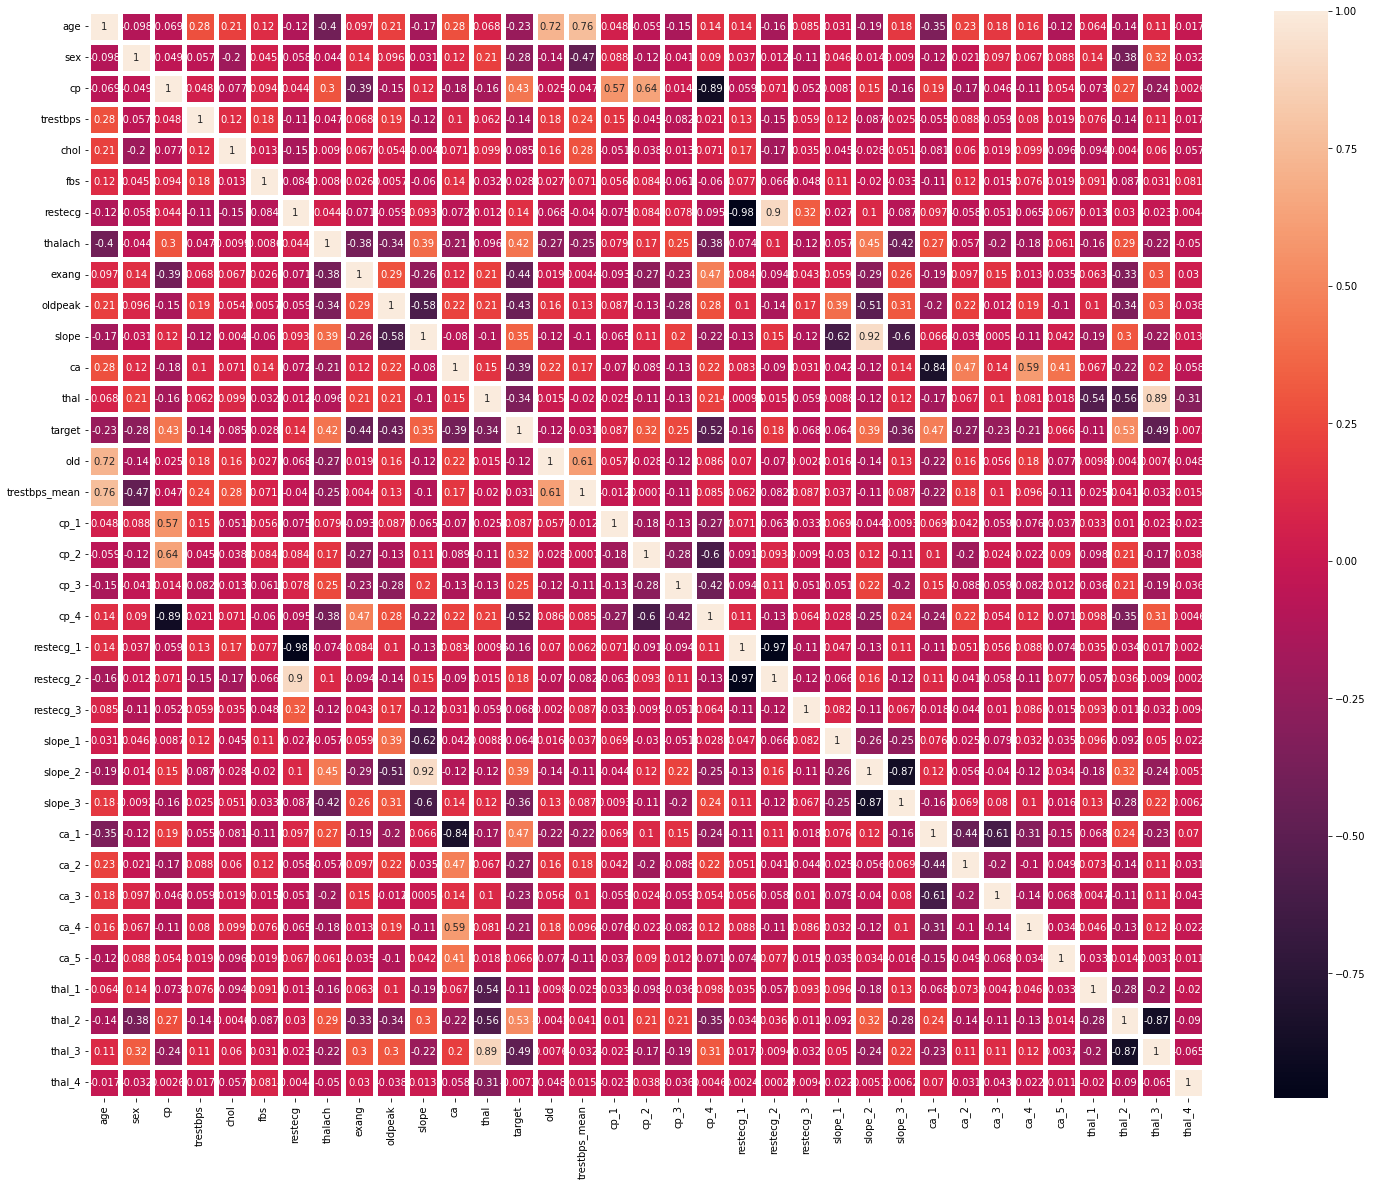

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(heart.corr(), linewidths=5, annot=True)